
# Central Limit Theorem (CLT) Demonstration using scikit-learn Dataset

## Objective
This notebook demonstrates the **Central Limit Theorem (CLT)** using a **skewed real-world dataset** from `scikit-learn`.
We will show that:

- The original data distribution can be skewed (non-normal)
- The **distribution of sample means** approaches a **normal distribution**
- The mean and standard deviation of sample means match CLT theory

---

# Central Limit Theorem (Statement)

Let $X_1, X_2, \dots, X_n$ be i.i.d. (independent and identically distributed) random variables with mean $\mu$ and variance $\sigma^2$. Then, for sufficiently large $n$:

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)
$$



### Key Takeaways for Students:
1. **The Shape:** Regardless of the shape of the original distribution (uniform, exponential, skewed), the distribution of the **sample mean** will always approach a Normal (bell-shaped) curve as $n$ increases.
2. **The Center:** The mean of the sample means is equal to the mean of the population ($\mu$).
3. **The Spread:** The variance of the sample mean is $\sigma^2/n$. This shows that as your sample size grows, your estimate becomes more precise (the bell curve gets narrower).
4. **The "Rule of 30":** In most introductory statistics courses, a sample size of $n \ge 30$ is considered the threshold where the Normal approximation becomes reliable.

---


In [ ]:

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

plt.rcParams['figure.figsize'] = (8, 5)



## Step 1: Load a Skewed Dataset

We use the **California Housing dataset** from `scikit-learn`.
The target variable `MedHouseVal` is **right-skewed**, making it ideal for demonstrating CLT.


In [ ]:

# Load dataset
data = fetch_california_housing()
y = data.target  # Median house value

# Population statistics
population_mean = np.mean(y)
population_std = np.std(y)

population_mean, population_std


(np.float64(2.068558169089147), np.float64(1.1539282040412253))

In [ ]:
y.shape

(20640,)


## Step 2: Visualize Original Data Distribution

Observe that the original data distribution is **not normal**.


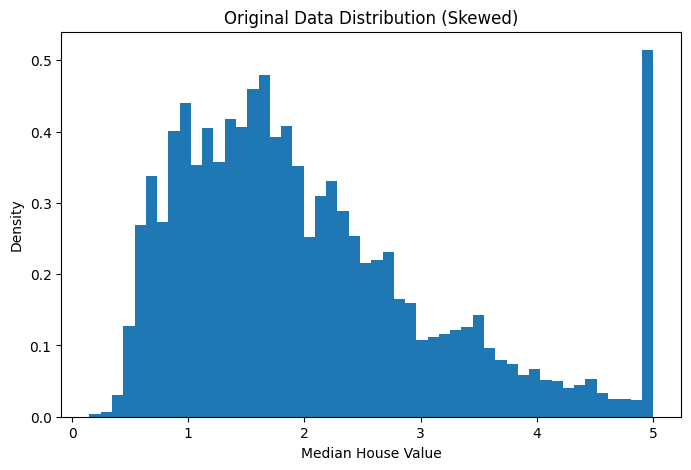

In [ ]:

plt.hist(y, bins=50, density=True)
plt.xlabel("Median House Value")
plt.ylabel("Density")
plt.title("Original Data Distribution (Skewed)")
plt.show()



## Step 3: Apply Central Limit Theorem

We now:
- Draw many random samples (with replacement)
- Compute the **mean of each sample**
- Analyze the distribution of these sample means


In [ ]:

np.random.seed(42)

sample_size = 50      # n
num_samples = 10000   # number of repeated samples

sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(y, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)


In [ ]:
sample_means.shape

(10000,)


## Step 4: Sampling Distribution of the Mean

According to CLT, this distribution should be approximately **normal**.


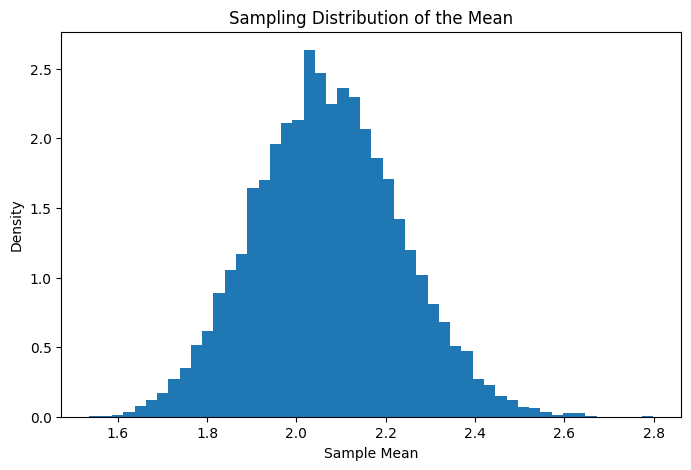

In [ ]:

plt.hist(sample_means, bins=50, density=True)
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.title("Sampling Distribution of the Mean")
plt.show()



## Step 5: Verify CLT Numerically

According to theory:

\[
E(\bar{X}) = \mu
\]

\[
\text{SD}(\bar{X}) = \frac{\sigma}{\sqrt{n}}
\]

We compare **theoretical** and **empirical** values.


## According to Theory

According to the Central Limit Theorem:

$$
\mathbb{E}(\bar{X}) = \mu
$$

$$
\mathrm{SD}(\bar{X}) = \frac{\sigma}{\sqrt{n}}
$$

---


In [ ]:
np.mean(sample_means)

np.float64(2.0698626492000005)

In [ ]:
np.std(sample_means)

np.float64(0.16309793362621797)

In [ ]:
population_std/np.sqrt(50)

np.float64(0.16319009161599288)

In [ ]:

# Empirical statistics from sampling distribution
empirical_mean = np.mean(sample_means)
empirical_std = np.std(sample_means)

# Theoretical CLT values
theoretical_mean = population_mean
theoretical_std = population_std / np.sqrt(sample_size)

print("Population Mean:", population_mean)
print("Mean of Sample Means:", empirical_mean)

print("\nTheoretical Std (σ/√n):", theoretical_std)
print("Empirical Std of Sample Means:", empirical_std)


Population Mean: 2.068558169089147
Mean of Sample Means: 2.0698626492000005

Theoretical Std (σ/√n): 0.16319009161599288
Empirical Std of Sample Means: 0.16309793362621797



## Step 6: Effect of Sample Size on CLT

We now repeat the experiment for different sample sizes.
As sample size increases:
- Distribution becomes more normal
- Variance decreases


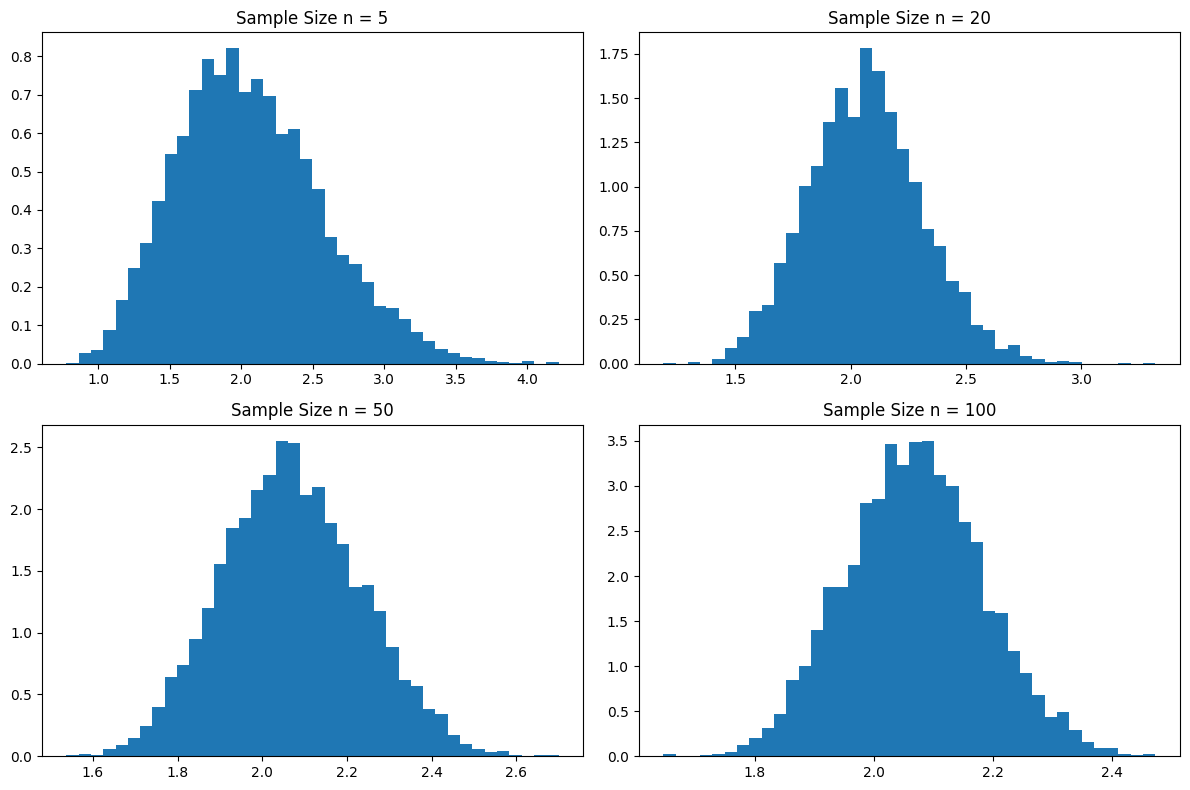

In [ ]:

sample_sizes = [5, 20, 50, 100]

plt.figure(figsize=(12, 8))

for i, n in enumerate(sample_sizes):
    means = [
        np.mean(np.random.choice(y, size=n, replace=True))
        for _ in range(5000)
    ]
    plt.subplot(2, 2, i + 1)
    plt.hist(means, bins=40, density=True)
    plt.title(f"Sample Size n = {n}")

plt.tight_layout()
plt.show()



## Final Observations

- Original data is **skewed**
- Sampling distribution of mean is **approximately normal**
- Mean of sample means ≈ population mean
- Std of sample means ≈ σ / √n

---

### Why CLT matters?

CLT is the theoretical foundation for:
- **Z-test**
- **t-test**
- **Confidence Intervals**
- **A/B Testing**

Even with non-normal data, inference on means is valid for large samples.
